# Workshop 6: Logistic Regression

## 1. Linear Equation
$$\theta_1 x_1 + \theta_2 x_2 + \ldots + \theta_n x_n$$

In [3]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np

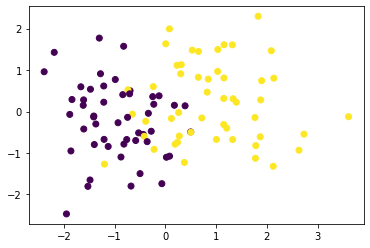

In [7]:
# Generate classification dataset
x, y = make_classification(n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1,random_state=2043)
X = np.concatenate((np.ones((x.shape[0],1)), x),axis=1)

plt.scatter(X[:,1], X[:,2], c=y)

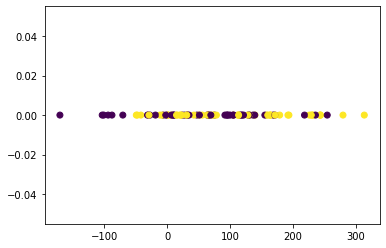

In [19]:
theta = np.array([80,2,100])
linear_sum = X@theta
plt.scatter(linear_sum, [0 for i in range(len(linear_sum))], c=y)

## 2. Logistic Regression
### 2.1 Prediction function for logistic regression
$$
h_\theta(x)=\frac{1}{1+e^{-\theta^T x}}
$$

This is the hypothetical function of logistic regression, also named as the prediction function.

#### Exercise 1. Could you use `Matplotlib` library to draw the graphic of function
$$
h_\theta(z)=\frac{1}{1+e^{-z}}
$$

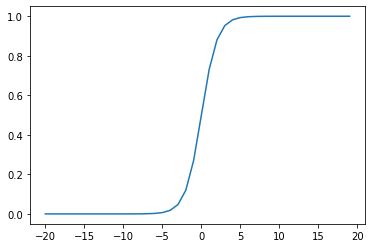

In [24]:
z=np.array([i for i in range(-20,20)])
hz = 1/(1+1/np.exp(z))
plt.plot(z,hz)

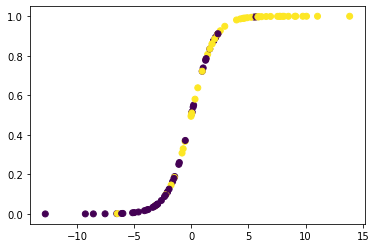

In [67]:
theta = np.array([1,2,4])
linear_sum = X@theta
hz = 1/(1+1/np.exp(linear_sum))
plt.scatter(linear_sum, hz, c=y)

### 2.2 Cost function
$$
\begin{aligned}
&J(\theta)=\frac{1}{m} \sum_{i=1}^m \operatorname{Cost}\left(h_\theta\left(x^i\right), y^i\right) \\
&=-\frac{1}{m}\left[\sum_{i=1}^m y^i \log h_\theta\left(x^i\right)+\left(1-y^i\right) \log \left(1-h_\theta\left(x^i\right)\right)\right]
\end{aligned}
$$

#### Exercise 2. Could you interpret the equation above to Python code?

In [34]:
Loss = (-1/len(y))*sum(y * np.log(hz) + (1-y) * np.log(1-hz))
Loss

0.6760309826740135

### 2.3 Gradient Descent
$$
\theta_j:=\theta_j-\alpha \frac{1}{m} \sum_{i=1}^m\left(h_\theta\left(x^i\right)-y^i\right) x_j^i
$$

#### Exercise 3. Complete the rest steps of logistic regression.

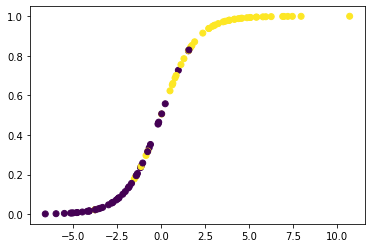

In [64]:
theta = np.array([1,2,4],dtype="float64")
linear_sum = X@theta
hz = 1/(1+1/np.exp(linear_sum))

lr = 0.001
loss_list=[]
for epoch in range(2000):
    
    Loss = (-1/len(y))*sum(y * np.log(hz) + (1-y) * np.log(1-hz))
    loss_list.append(Loss)
    
    theta-=lr*X.T@(hz-y)
    hz = 1/(1+np.exp(-(X@theta)))


plt.scatter(X@theta, hz, c=y)

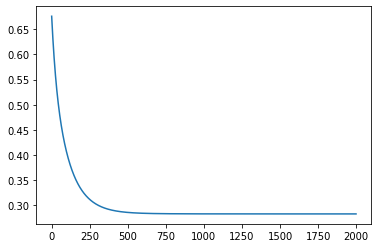

In [65]:
plt.plot(loss_list)